<a href="https://colab.research.google.com/github/Supratik27/Google_Colab_notebook/blob/main/K_Nearest_Neighbours_(KNN_algorithm)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of KNN alogorithm with Scikit-Learn in Iris dataset

---



At first, we are importing the necessary Python packages.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will import the iris dataset and read it with pandas

In [3]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Assigning the column names to the dataset
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
#Reading the dataset using pandas
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [4]:
data.head() #It reads the first 5 rows of the dataframe

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we will split the dataset into attributes and labels

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

#We will split the dataset into 70% train data and 30% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Now we will scale the features so that they are uniformly evaluated

In [19]:
from sklearn.preprocessing import StandardScaler #Used for data normalization
scaler = StandardScaler()
scaler.fit(X_train) #It calculates the mean and standard deviation
X_train = scaler.transform(X_train)  #It does Normalization[(Data-mean)/standard deviation]
X_test = scaler.transform(X_test)

Now we will fit the KNN algorithm with the datasets

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train) #train the datasets with KNN algorithm

KNeighborsClassifier(n_neighbors=12)

Now, we have to make the prediction

In [43]:
y_pred = classifier.predict(X_test) #This function helps in prediction operation

Now we will print the results

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[14  0  0]
 [ 0 14  1]
 [ 0  1 15]]


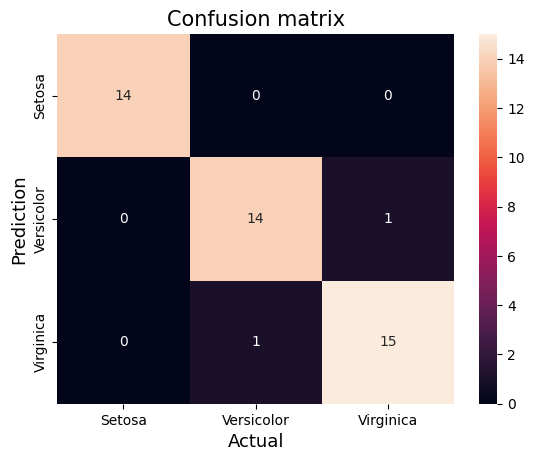

In [46]:
sns.heatmap(result,
            annot=True,
            fmt="g",
            xticklabels=["Setosa","Versicolor","Virginica"],
            yticklabels=["Setosa","Versicolor","Virginica"])
plt.ylabel("Prediction",fontsize=13)
plt.xlabel("Actual",fontsize=13)
plt.title("Confusion matrix",fontsize=15)
plt.show()


In [47]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


:Using the KNN algorithm, we have achieved an accuracy of 95.55% (approximately) with k=12.